**Importing Libraries**


In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles,make_moons

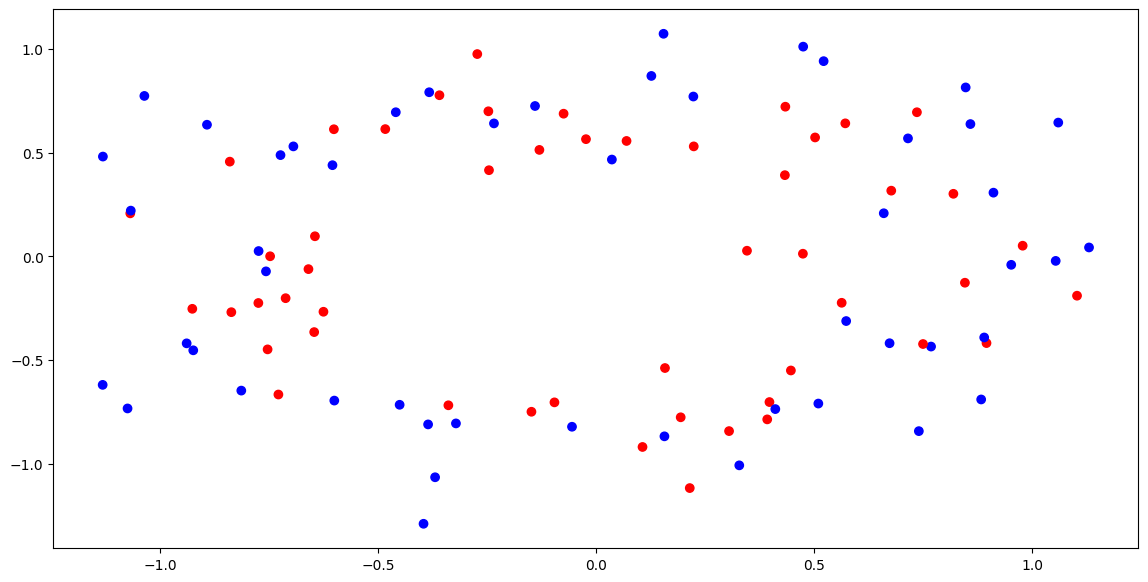

In [8]:
np.random.seed(800)
X,y=make_circles(n_samples=100,noise=0.2,random_state=1)
zero_one_colourmap=ListedColormap(('blue','red'))
rcParams['figure.figsize']=14,7
plt.scatter(X[:,0],X[:,1],c=y,cmap=zero_one_colourmap)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


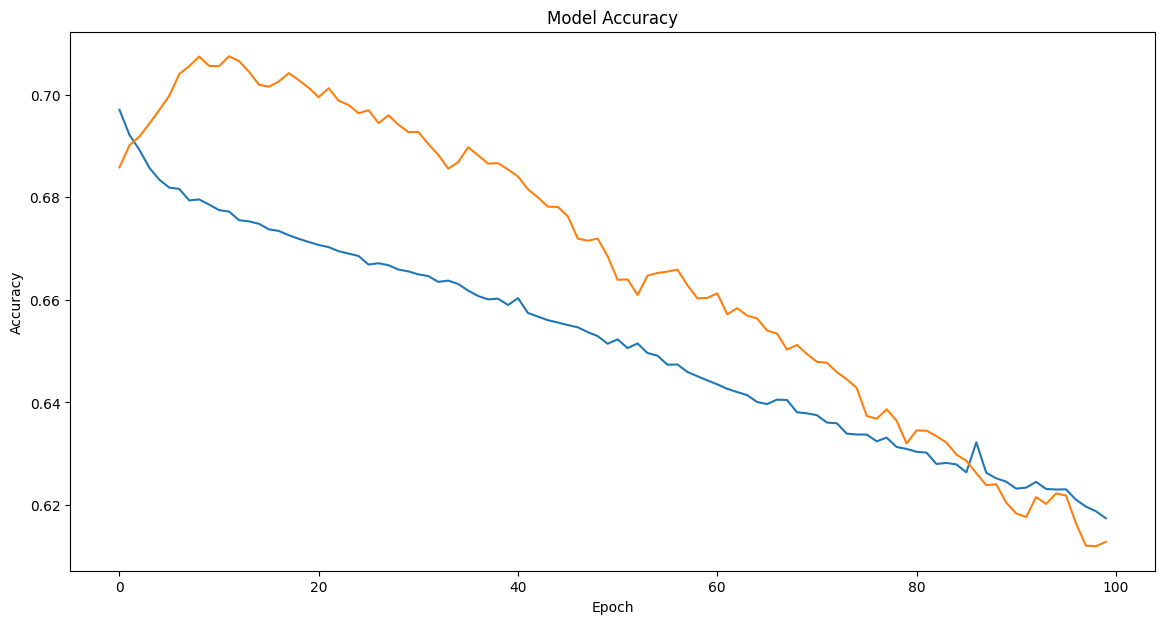

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=0, validation_data=(X_test, y_test))
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
reg_model=Sequential()
reg_model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer='l2')) # Corrected keyword argument
reg_model.add(Dense(1,activation='sigmoid',kernel_regularizer='l2')) # Corrected keyword argument
reg_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
reg_history=reg_model.fit(X_train,y_train,epochs=1000,batch_size=10,verbose=0, validation_data=(X_test, y_test))

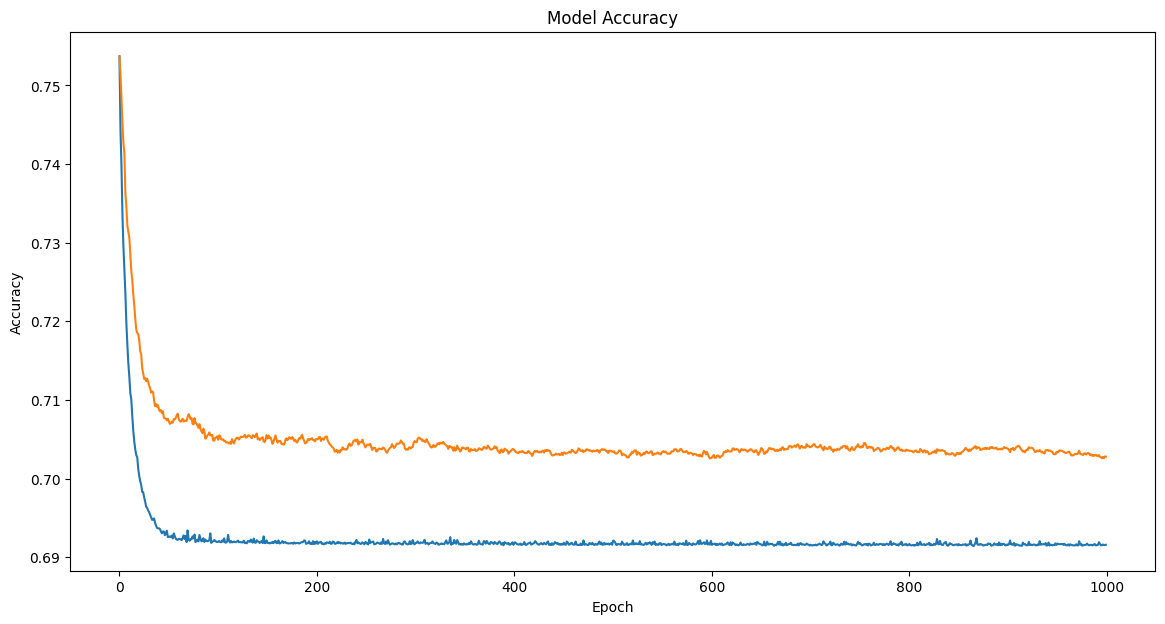

In [13]:
plt.plot(reg_history.history['loss'],label="train")
plt.plot(reg_history.history['val_loss'],label="test")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()